# Stackoverflow Tag Prediction

## Business Problem

Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br><br>
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.

## Problem Statemtent
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

## Data Source
Source: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/

## Real World / Business Objectives and Constraints
1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

## Data Overview
Train.csv contains 4 columns: Id,Title,Body,Tags.

Test.csv contains the same columns but without the Tags, which you are to predict.

Size of Train.csv - 6.75GB

Number of rows in Train.csv = 6034195

The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).


### Data Field Explaination

Dataset contains 6,034,195 rows. The columns in the table are:

Id - Unique identifier for each question

Title - The question's title

Body - The body of the question

Tags - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')

## Example Datapoint
<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

## Mapping problem to Machine Learning Problem
### Type of Machine Learning Problem
It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html

## Key Performance Index
<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import re
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import sparse
from wordcloud import WordCloud
from sqlalchemy import create_engine # database connection
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
DATAPATH = "../Data/"
DATA_DB = "TRAIN.db"
DATA_CSV = "TRAIN.csv"
DATA_DB_DEDUP = "TRAIN_NEW.db"
DATA_PROCESSED = "PROCESSED.DB"

## 1. Exploratory Data Analysis

### 1.1 Reading Data

In [25]:
if not os.path.isfile(os.path.join(DATAPATH, DATA_DB)):
    start = datetime.now()
    #this sqlalchemy create_engine creates an in-memory SQLite database.
    engine = create_engine("sqlite:///"+os.path.join(DATAPATH, DATA_DB)) #https://docs.sqlalchemy.org/en/13/core/engines.html
    chunksize = 150
    cnt = 0
    for rows in pd.read_csv(os.path.join(DATAPATH, DATA_CSV), names = ["Id", "Title", "Body", "Tags"], chunksize = chunksize, iterator = True):
        cnt+=1
        rows.to_sql('Rows', engine, if_exists='append', index = False)
        if cnt % 1000 == 0:
            print("{} rows written".format(cnt*chunksize))
    print("Time taken to run this cell :", datetime.now() - start)
    
#Here above what we are doing is that, first we have created an in memory sqlite database using the line: 
#"create_engine("sqlite:///"+os.path.join(DATAPATH, DATA_DB))". 
#After this we are reading our csv file in chunks of 150 as an iterator. It simply means that whenever the loop runs we are 
#simply reading 150 rows everytime and appending this 150 rows in the sqlite database created above in the table name "Rows". 

150000 rows written
300000 rows written
450000 rows written
600000 rows written
750000 rows written
900000 rows written
1050000 rows written
1200000 rows written
1350000 rows written
1500000 rows written
1650000 rows written
1800000 rows written
1950000 rows written
2100000 rows written
2250000 rows written
2400000 rows written
2550000 rows written
2700000 rows written
2850000 rows written
3000000 rows written
3150000 rows written
3300000 rows written
3450000 rows written
3600000 rows written
3750000 rows written
3900000 rows written
4050000 rows written
4200000 rows written
4350000 rows written
4500000 rows written
4650000 rows written
4800000 rows written
4950000 rows written
5100000 rows written
5250000 rows written
5400000 rows written
5550000 rows written
5700000 rows written
5850000 rows written
6000000 rows written
Time taken to run this cell : 1:58:27.758395


### 1.2 Counting number of rows

In [2]:
if os.path.isfile(os.path.join(DATAPATH, DATA_DB)):
    start = datetime.now()
    connection = sqlite3.connect(os.path.join(DATAPATH, DATA_DB))
    data_count = pd.read_sql_query("SELECT COUNT(*) FROM Rows", connection)
    connection.close()
    print("Total number of rows in database = {}".format(data_count["COUNT(*)"][0]))
    print("Time taken to run this cell :", datetime.now() - start)

Total number of rows in database = 6034196
Time taken to run this cell : 0:09:44.047697


### 1.3 Checking and deleting the Duplicates 

In [4]:
if os.path.isfile(os.path.join(DATAPATH, DATA_DB)):
    start = datetime.now()
    connection = sqlite3.connect(os.path.join(DATAPATH, DATA_DB))
    data_dup = pd.read_sql_query("SELECT Title, Body, Tags, COUNT(*) as Count_Dup FROM Rows GROUP BY Title, Body, Tags", connection)
    connection.close()
    print("Time taken to run this cell : {}".format(datetime.now() - start))
#In this cell, this above sql command will group the title, body and tags where all of them are similar and then it will count
#their occurances.

Time taken to run this cell : 1:03:10.595974


In [5]:
data_dup.head()

,Title,Body,Tags,Count_Dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2


In [14]:
print("Percentage of duplicate data points = {}({}%)".format((data_count["COUNT(*)"][0]-data_dup.shape[0]), (((data_count["COUNT(*)"][0]-data_dup.shape[0])/data_count["COUNT(*)"][0])*100)))

Percentage of duplicate data points = 1827881(30.292038906260256%)


In [16]:
data_dup['Count_Dup'].value_counts()

1    2656284
2    1272336
3     277575
4         90
5         25
6          5
Name: Count_Dup, dtype: int64

In [4]:
if not os.path.isfile(os.path.join(DATAPATH, DATA_DB_DEDUP)):
    engine = create_engine("sqlite:///"+os.path.join(DATAPATH, DATA_DB_DEDUP))
    data_dup = pd.DataFrame(data_dup, columns=['Title', 'Body', 'Tags'])
    data_dup.to_sql("no_dup_train", engine)

In [17]:
#Above to above cell shows that there are 2656284 data points which occurred only once, 1272336 data points which occurred 2 
#times, 277575 data points which occurred 3 times, 90 data points which occurred 4 times, 25 data points which occurred 5 times,
#5 data points which occurred 6 times. 
#We have to keep all of the data points which occurred only once, rest we will keep only one occurrances of all the data points
#which occurred more that once. And in "data_dup" dataframe all of the data points which occurred only once are already present
#and all of the data points whose occurrances are more than once are present only one time. So, "data_dup" will be our final 
#dataframe that we will use and hence we have converted "data_dup" dataframe into sqlite database with name "TRAIN_NEW.db" and
#table name is "no_dup_train". We will use this database only from now on. 

### 1.4 Analysis of Tags

#### 1.4.1 Distribution of tags per question

In [4]:
if os.path.isfile(os.path.join(DATAPATH, DATA_DB_DEDUP)):
    con = sqlite3.connect(os.path.join(DATAPATH, DATA_DB_DEDUP))
    data_tags = pd.read_sql_query("SELECT Tags FROM no_dup_train", con)
    data_tags_count = data_tags["Tags"].apply(lambda x: len(x.split(" "))) #series.apply(func) invoke function on values of Series.
    data_tags['Tags_Count'] = data_tags_count
    data_tags.head()

,Tags,Tags_Count
0,c++ c,2
1,c# silverlight data-binding,3
2,c# silverlight data-binding columns,4
3,jsp jstl,2
4,java jdbc,2


In [8]:
print("Maximum number of tags per question = "+str(max(data_tags['Tags_Count'])))
print("Minimum number of tags per question = "+str(min(data_tags['Tags_Count'])))
print("Avg number of tags per question = "+str(sum(data_tags['Tags_Count'])/len(data_tags['Tags_Count'])))

Maximum number of tags per question = 5
Minimum number of tags per question = 1
Avg number of tags per question = 2.8994392954403083


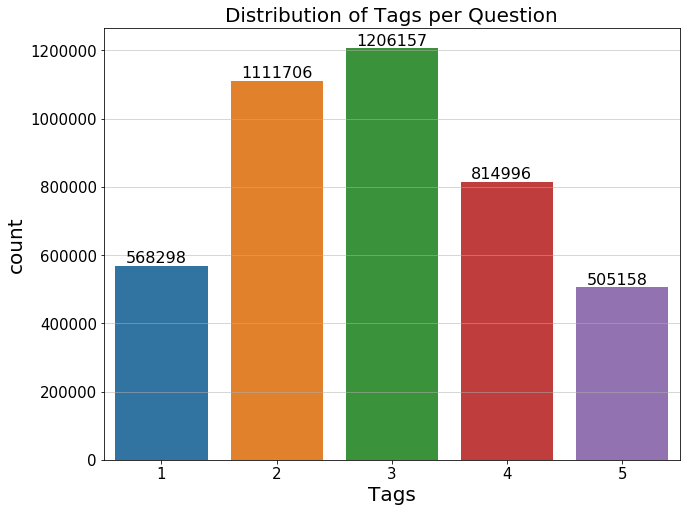

In [47]:
fig = plt.figure(figsize = (8, 6))
axes = fig.add_axes([0.1,0.1,1,1])
axes.set_title("Distribution of Tags per Question", fontsize = 20)
axes.set_xlabel("Tags", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
plt.grid(linestyle='-', linewidth=0.5)
axes.tick_params(labelsize = 15)
sns.countplot(list(data_tags['Tags_Count']), ax = axes)
for i in axes.patches:
    axes.text(i.get_x()+0.09, i.get_height()+9500, str(round(i.get_height(), 2)), fontsize=16, color='black')
plt.show()

In [48]:
data_tags['Tags_Count'].value_counts()

3    1206157
2    1111706
4     814996
1     568298
5     505158
Name: Tags_Count, dtype: int64

In [ ]:
#above cell shows that most of the data points have 3 tags then 2 tags and so on.

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

#### 1.4.2 Total number of unique tags

In [50]:
if os.path.isfile(os.path.join(DATAPATH, DATA_DB_DEDUP)):
    con = sqlite3.connect(os.path.join(DATAPATH, DATA_DB_DEDUP))
    data_tags = pd.read_sql_query("SELECT Tags FROM no_dup_train", con)
    vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "))
    data_bow = vectorizer.fit_transform(data_tags['Tags'])
    con.close()

In [51]:
print("Total number of datapoints = {}".format(data_bow.shape[0]))
print("Total number of unique tags = {}".format(data_bow.shape[1]))

Total number of datapoints = 4206315
Total number of unique tags = 42048


In [52]:
print("Some of the tags in our data: {}".format(vectorizer.get_feature_names()[:15]))

Some of the tags in our data: ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each', '.emf', '.exe', '.exe.config', '.hgtags']


#### 1.4.3 Number of times Tags appeared in our data

In [53]:
#top 10 highest occurring tags
col_sum = data_bow.sum(axis = 0).A1 #data_bow.sum(axis = 0) will sum the column of sparse matrix then .A1 will convert that 
                                    #matrix into array.
feat_count = dict(zip(vectorizer.get_feature_names(), col_sum))
feat_count_sorted = dict(sorted(feat_count.items(), key = lambda x: x[1], reverse = True))
count_data = {"Tags":list(feat_count_sorted.keys()), "Count": list(feat_count_sorted.values())}
count_df = pd.DataFrame(data = count_data)
count_df[:10]

,Tags,Count
0,c#,331505
1,java,299414
2,php,284103
3,javascript,265423
4,android,235436
5,jquery,221533
6,c++,143936
7,python,134137
8,iphone,128681
9,asp.net,125651


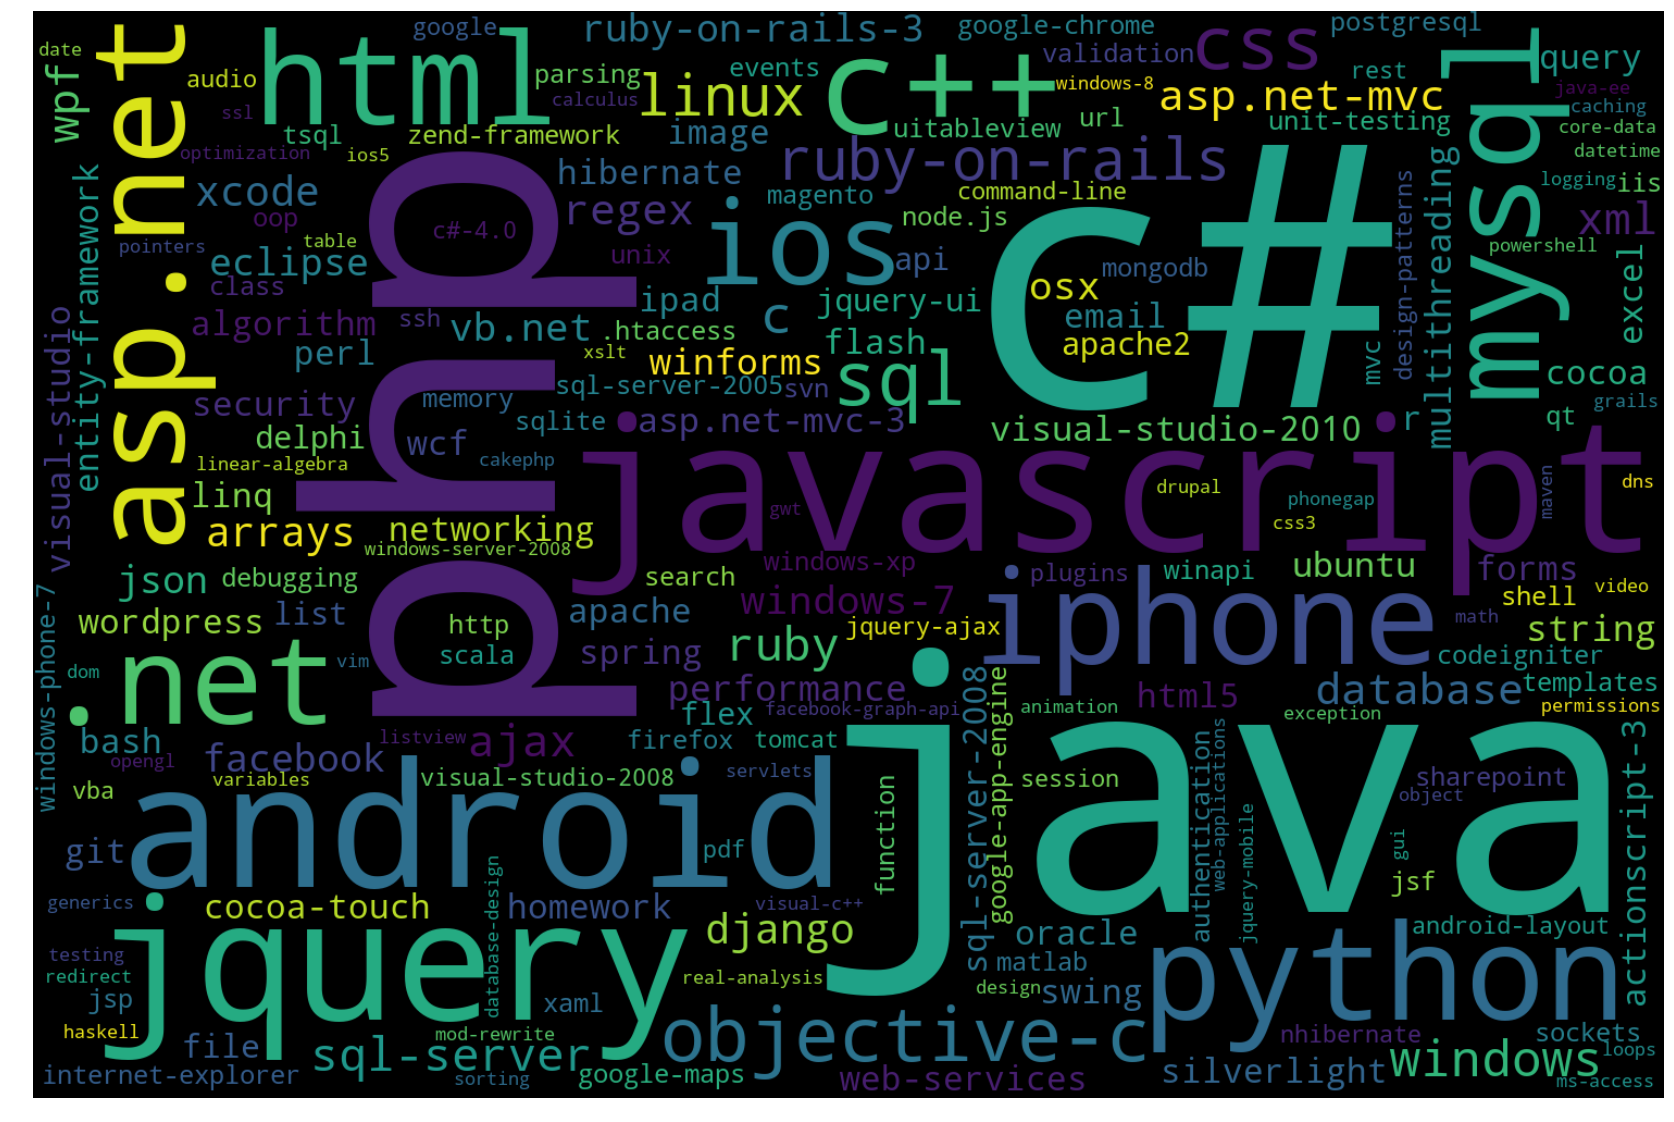

In [59]:
worcloudPlot = WordCloud(background_color="black", width=1500, height=1000)
worcloudPlot.generate_from_frequencies(frequencies=feat_count)
plt.figure(figsize=(30,20))
plt.imshow(worcloudPlot, interpolation="bilinear")
plt.axis("off")
plt.show()

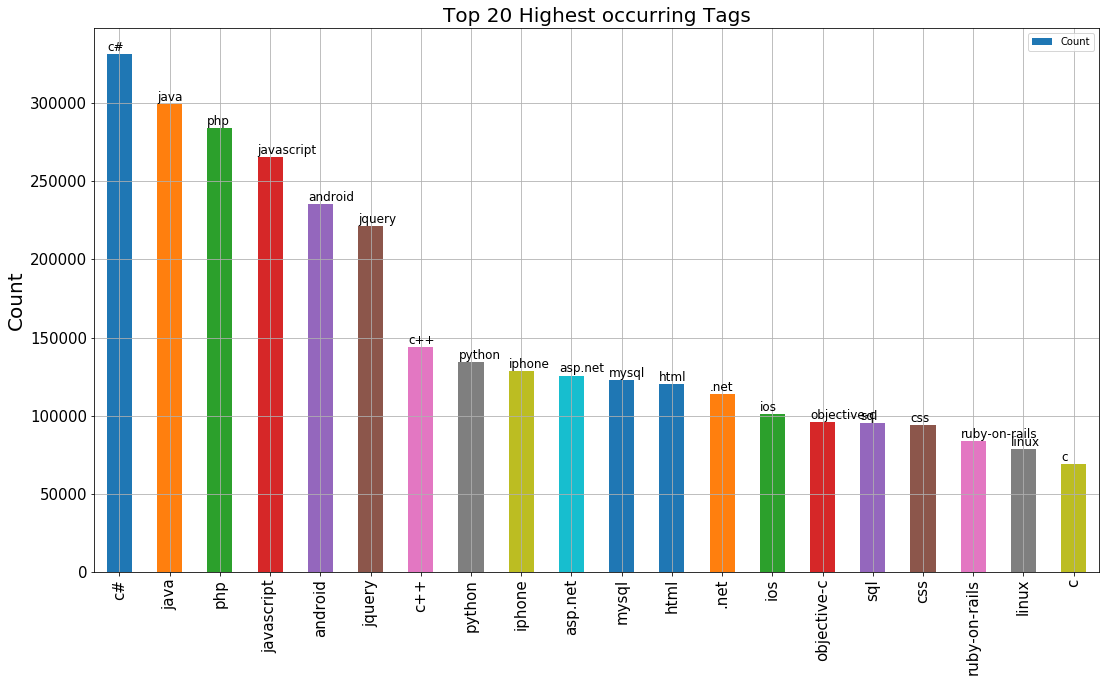

In [89]:
axes = count_df.head(20).plot(x = 'Tags', y = 'Count', kind = 'bar', figsize = (18, 10), fontsize = 15, grid = True)
plt.xlabel("")
plt.ylabel("Count", fontsize = 20)
plt.title("Top 20 Highest occurring Tags", fontsize = 20)
cnt = 0
for i in axes.patches:
    axes.text(i.get_x(), i.get_height()+2000, count_df.head(20)['Tags'][cnt], fontsize=12, color='black')
    cnt +=1

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

#### 1.4.4 Plots of Frequency distribution of tags

In [7]:
frequency_tags = list(feat_count_sorted.values())

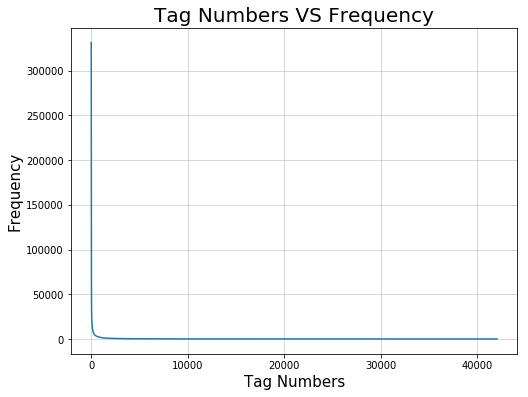

In [44]:
plt.figure(figsize = (8, 6))
plt.plot(frequency_tags)
plt.title("Tag Numbers VS Frequency", fontsize=20)
plt.xlabel("Tag Numbers", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.grid(linestyle='-', linewidth=0.5)

Above plot shows that there are very few tags whose frequency is very high, however, there are many tags whose frequency is very low.<br>
So, we will now plot the first 1000 most frequently occurring tags.

[331505, 44829, 22429, 17728, 13364, 11162, 10029, 9148, 8054, 7151, 6466, 5865, 5370, 4983, 4526, 4281, 4144, 3929, 3750, 3593, 3453, 3299, 3123, 2989, 2891, 2738, 2647, 2527, 2431, 2331, 2259, 2186, 2097, 2020, 1959, 1900, 1828, 1770, 1723, 1673]


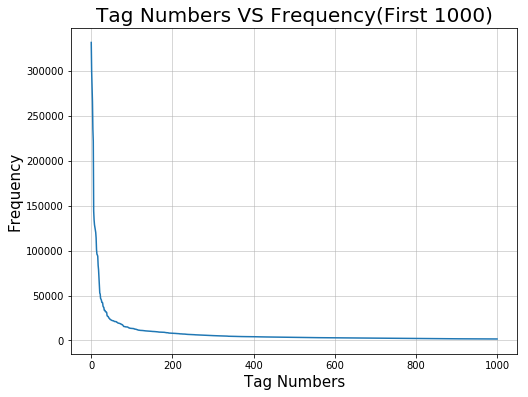

In [49]:
plt.figure(figsize = (8, 6))
plt.plot(frequency_tags[:1000])
plt.title("Tag Numbers VS Frequency(First 1000)", fontsize=20)
plt.xlabel("Tag Numbers", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.grid(linestyle='-', linewidth=0.5)
print(frequency_tags[0:1000:25])

Even from above plot we are not be able to know how many tags are there whose occurrances are high?

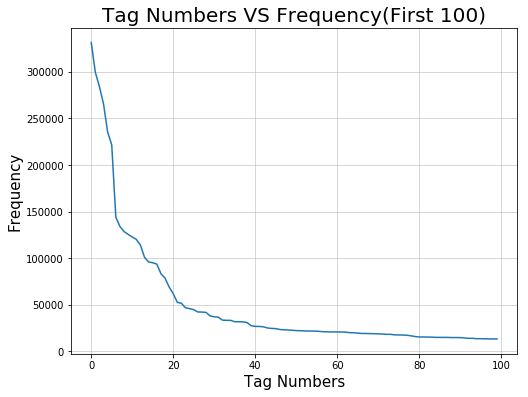

In [50]:
plt.figure(figsize = (8, 6))
plt.plot(frequency_tags[:100])
plt.title("Tag Numbers VS Frequency(First 100)", fontsize=20)
plt.xlabel("Tag Numbers", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.grid(linestyle='-', linewidth=0.5)

In [51]:
print(frequency_tags[0:100])

[331505, 299414, 284103, 265423, 235436, 221533, 143936, 134137, 128681, 125651, 122769, 120237, 114087, 101010, 95981, 95160, 93745, 83487, 78670, 69169, 62023, 52665, 51732, 46769, 45940, 44829, 42369, 42285, 41894, 38158, 37170, 36799, 33624, 33408, 33373, 31897, 31874, 31750, 31069, 27658, 26925, 26809, 26470, 25183, 24722, 24537, 23585, 23230, 23083, 22747, 22429, 22246, 22044, 21942, 21876, 21820, 21426, 21090, 21006, 20969, 20957, 20934, 20730, 20180, 20096, 19758, 19322, 19299, 19161, 19065, 18905, 18705, 18432, 18387, 17804, 17728, 17640, 17383, 16778, 16004, 15533, 15531, 15425, 15380, 15154, 15097, 15096, 15087, 14936, 14923, 14884, 14519, 14108, 14066, 13705, 13703, 13543, 13532, 13403, 13403]


From above plot we can easily observe that first 20 tags are occurring more than 50k times. 100th tag is occurring approx 13k times.

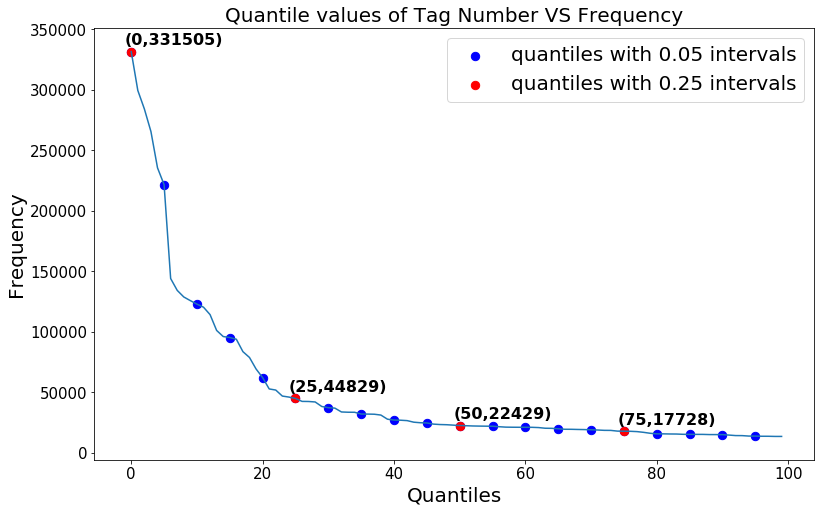

In [32]:
fig = plt.figure(figsize = (10, 6))

axes = fig.add_axes([0.1,0.1,1,1])
axes.set_title("Quantile values of Tag Number VS Frequency", fontsize = 20)
axes.set_xlabel("Quantiles", fontsize = 20)
axes.set_ylabel("Frequency", fontsize = 20)
axes.plot(frequency_tags[0:100])

plt.scatter(x = np.arange(0, 100, 5), y = frequency_tags[0:100][::5], c = "blue", s = 70, label="quantiles with 0.05 intervals")
plt.scatter(x = np.arange(0, 100, 25), y = frequency_tags[0:100][::25], c = "red", s = 70, label="quantiles with 0.25 intervals")
plt.legend(loc='upper right', fontsize = 20)

for x, y in zip(np.arange(0, 100, 25), frequency_tags[0:100][::25]):
    plt.annotate(s = '({},{})'.format(x, y), xy = (x, y), fontweight='bold', fontsize = 16, xytext=(x-1, y+5500))
    
axes.tick_params(labelsize = 15)

In [41]:
print("Number of tags occurring in more than 10k datapoints = {}".format(count_df[count_df['Count']>10000].shape[0]))
print("Number of tags occurring in more than 100k datapoints = {}".format(count_df[count_df['Count']>100000].shape[0]))

Number of tags occurring in more than 10k datapoints = 153
Number of tags occurring in more than 100k datapoints = 14


<b>Observations:</b>
1. There are 153 tags which are occurring in more than 10k datapoints.
2. There are 14 tags which are occurring in more than 100k datapoints.
3. Most frequent tag is c# which is occurring in 331505 datapoints.

## 2. Cleaning and preprocessing of Questions
1. Sample 300k data points
2. Separate out code-snippets from Body
3. Remove Spcial characters from Question title and description (not in code)
4. Remove stop words (Except 'C', because 'C' itself is a name of a programming language)
5. Remove HTML Tags
6. Convert all the characters into small letters
7. Use SnowballStemmer to stem the words

### 2.1 Creating New Database with sampled rows and preprocess the questions

In [164]:
conn = sqlite3.connect(os.path.join(DATAPATH, DATA_PROCESSED))
c = conn.cursor()
query = "CREATE TABLE ProcessedQuestions(Questions text NOT NULL, Code text, Tags text NOT NULL, LengthPre integer, LengthPost integer, IsCode integer);"
c.execute(query)
conn.commit()
conn.close()

In [165]:
conn = sqlite3.connect(os.path.join(DATAPATH, DATA_PROCESSED))
c = conn.cursor()
query = "SELECT COUNT(*) FROM ProcessedQuestions;"
c.execute(query)
print("Number of rows in database = {}".format(c.fetchall()[0][0]))
conn.close()

Number of rows in database = 0


In [166]:
conn = sqlite3.connect(os.path.join(DATAPATH, DATA_PROCESSED))
c = conn.cursor()
query = "SELECT * FROM ProcessedQuestions;"
columnNames = c.execute(query)
print("Column names = {}".format(list(map(lambda x: x[0], columnNames.description))))
conn.close()

Column names = ['Questions', 'Code', 'Tags', 'LengthPre', 'LengthPost', 'IsCode']


In [167]:
start = datetime.now()

if os.path.isfile(os.path.join(DATAPATH, DATA_PROCESSED)):
    conn_w = sqlite3.connect(os.path.join(DATAPATH, DATA_PROCESSED))
    writer = conn_w.cursor()

if os.path.isfile(os.path.join(DATAPATH, DATA_DB_DEDUP)):
    conn_r = sqlite3.connect(os.path.join(DATAPATH, DATA_DB_DEDUP))
    reader = conn_r.cursor()
    reader.execute("SELECT Title, Body, Tags FROM no_dup_train ORDER BY RANDOM() LIMIT 300000;")

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
QuestionsProcessed = 0
questionsWithCode = 0
lenPre = 0
lenPost = 0

for row in reader:
    
    isCode = 0
    title, body, tags = row[0], row[1], row[2]
    
    if '<code>' in body:
        questionsWithCode += 1
        isCode = 1
    lenCurrentQues = len(title)+len(body)
    lenPre += lenCurrentQues
    
    codePart = str(re.findall('<code>(.*?)</code>', body, flags = re.DOTALL))

    question = re.sub("<code>(.*?)</code>",'',body, flags = re.DOTALL)  #removing anything which comes in between <code></code>

    question = re.sub('<.*?>', '', str(question)) #removing html tags from question
    
    question = str(title)+" "+str(question)
    question = re.sub('[^A-Za-z]+', ' ', question) #remove any special character. 
    words = word_tokenize(str(question.lower())) #it will tokenize all the words automatically
    
    question = ' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j != 'c'))
    #Above line will remove all single letter and and stopwords from question except for the letter 'c'
    lenPost += len(question)
    data = (question, codePart, tags, lenCurrentQues, len(question), isCode)
    writer.execute("INSERT INTO ProcessedQuestions VALUES (?,?,?,?,?,?)",data)
    QuestionsProcessed += 1
    if (QuestionsProcessed % 30000 == 0):
        print("Number of questions processed = {}".format(QuestionsProcessed))
        
AvgLengthQuesPre = lenPre*1.0/QuestionsProcessed
AvgLengthQuesPost = lenPost*1.0/QuestionsProcessed

print("\nAverage length of questions(Title+body) before processing = {}".format(AvgLengthQuesPre))
print("Average length of questions(Title+body) after processing = {}".format(AvgLengthQuesPost))
print("Percentage of questions containing code = {}%".format((questionsWithCode*1.0/QuestionsProcessed)*100))
    
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()
print("\nTotal time taken: "+str(datetime.now() - start))

Number of questions processed = 30000
Number of questions processed = 60000
Number of questions processed = 90000
Number of questions processed = 120000
Number of questions processed = 150000
Number of questions processed = 180000
Number of questions processed = 210000
Number of questions processed = 240000
Number of questions processed = 270000
Number of questions processed = 300000

Average length of questions(Title+body) before processing = 1165.4160166666666
Average length of questions(Title+body) after processing = 325.70208
Percentage of questions containing code = 57.653666666666666%

Total time taken: 0:18:24.990938


In [175]:
if os.path.isfile(os.path.join(DATAPATH, DATA_PROCESSED)):
    conn = sqlite3.connect(os.path.join(DATAPATH, DATA_PROCESSED))
    c = conn.cursor()
    c.execute("SELECT Questions FROM ProcessedQuestions ORDER BY RANDOM() LIMIT 10;")
    print("Some of the examples of PROCESSED QUESTIONS:\n\n")
    for row in c:
        print(row[0])
        print("-"*127)
    c.close()

Some of the examples of PROCESSED QUESTIONS:


ad valu global variabl time multipl thread add valu variabl time result crash someth els exampl thread ad valu thank
-------------------------------------------------------------------------------------------------------------------------------
refer function creat new function call anoth better style drawback either
-------------------------------------------------------------------------------------------------------------------------------
get filenam command paramet context menu suppos file store creat context menu command output show long file name path space want direct compil java file context menu command like abl get return full path file folder space name tri search mani site
-------------------------------------------------------------------------------------------------------------------------------
ignor blank line comment line use awk write code code ignor blank line also want ignor line start comment idea add multipl pattern

In [170]:
conn = sqlite3.connect(os.path.join(DATAPATH, DATA_PROCESSED))
processedData = pd.read_sql_query("SELECT Questions, Tags FROM ProcessedQuestions", conn)
conn.close()
processedData.head()

,Questions,Tags
0,correct way complet rail creat action action p...,ruby-on-rails ruby design conventions
1,tree transform use visitor pattern disclaim ex...,java python tree abstract-syntax-tree visitor-...
2,pars error instal apk progrmat tri instal apk ...,android android-intent android-emulator apk
3,iphon manual manag work one comput iphon manua...,iphone itunes
4,regard timer class implement written java clas...,java


In [171]:
print("Total number of questions = {}".format(processedData.shape[0]))

Total number of questions = 300000


## 3. Machine Learning Models

### 3.1 Converting Tags for Multilabel Problem

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

1. https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/
2. https://stats.stackexchange.com/questions/117796/scikit-multi-label-classification
3. classifier = LabelPowerset(GaussianNB())

In [6]:
con = sqlite3.connect(os.path.join(DATAPATH, DATA_PROCESSED))
data_tags = pd.read_sql_query("SELECT Tags FROM ProcessedQuestions", con)
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "), binary = True)
data_bow = vectorizer.fit_transform(data_tags['Tags'])
con.close()

In [7]:
print("Shape of binary tags:",data_bow.shape)

Shape of binary tags: (300000, 26845)


In [8]:
print("Total number of unique tags = {}".format(data_bow.shape[1]))

Total number of unique tags = 26845


### 3.2 Taking sample of Tags
Now since we have a total of approx 26k unique tags and if we follow one-vs-rest approach then we have to literally train 26k models which is very cumbersome and huge computation power is required to do this task. So, we will choose the least number of tags so that maximum number of question should be covered. 

In [9]:
col_sum = data_bow.sum(axis = 0).A1   #data_bow.sum(axis = 0) will give the sum of all all the columns and A1 will convert that 
                                      #type matrix into an array
col_sum

array([ 1,  3,  1, ...,  1, 45,  1], dtype=int64)

In [10]:
sorted_tags = np.argsort(-col_sum)  #this will give indices of highest occurring tags in descending order. Means the first array
                                    #element corresponds to the index of highest occurring tag and so on.
sorted_tags

array([ 2825, 11614, 17405, ..., 14163, 14126, 26844], dtype=int64)

In [11]:
#c = np.matrix(np.arange(16).reshape(4,4)).getA()
# array([[ 0,  1,  2,  3],
#        [ 4,  5,  6,  7],
#        [ 8,  9, 10, 11],
#        [12, 13, 14, 15]])

# c[:,[0,3]]
# array([[ 0,  3],
#        [ 4,  7],
#        [ 8, 11],
#        [12, 15]])

def top_n_tags(n):
    multilabel_yn = data_bow[:,sorted_tags[:n]]  #now data_bow is a binary sparse matrix of tags where rows are data points and 
    #columns are tags names. Now, "sorted_tags[:n]" will give index of top 'n' highest occurring tags. So, 
    #data_bow[:, sorted_tags[:n]] will give columns of top 'n' highest occuring tags of binary sparse matrix.
    return multilabel_yn

def questionsCovered(n):
    multilabel_yn = top_n_tags(n)
    NonZeroQuestions = multilabel_yn.sum(axis = 1)  #multilabel_yn is a sparse binary matrix which contains only the columns of
    #top 'n' highest occurring tags. Now, multilabel_yn.sum(axis = 1) will sum() the rows of multilabel_yn sparse binary matrix.
    #It means that when we choose only the top 'n' highest occurring tags then there will be few questions which might contain 
    #the tags which are occurring very few times and those tags will be removed. Hence, the row sum for those points will
    #become zero. So, by counting the number of nonzero points we will get to know how many questions will be covered by taking 
    #top 'n' highest occurring tags.
    return np.count_nonzero(NonZeroQuestions), NonZeroQuestions

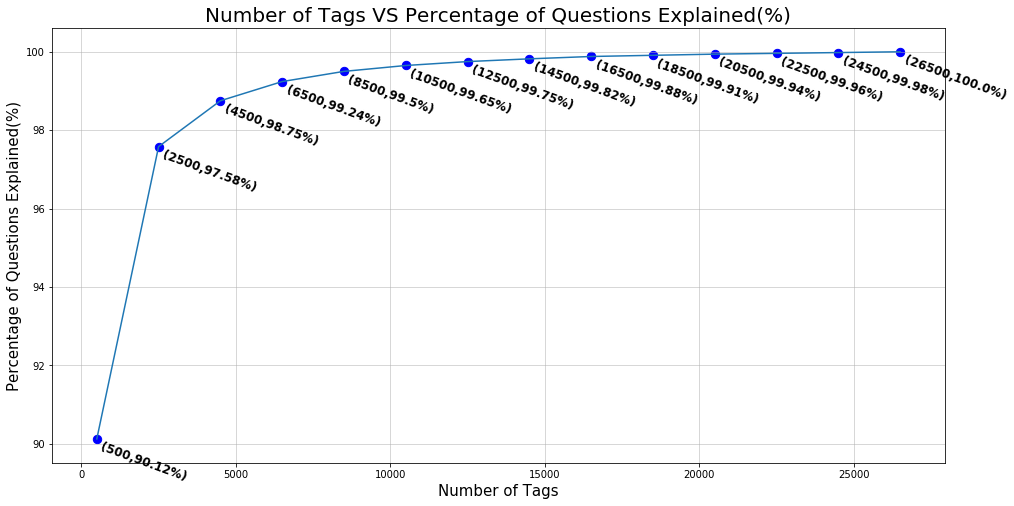

In [12]:
questionsExplained = []
numberOfTags = []
for i in range(500, 26800, 2000):
    questionsExplained.append(round((questionsCovered(i)[0]/data_bow.shape[0])*100,2))
    numberOfTags.append(i)
    
plt.figure(figsize = (16, 8))
plt.plot(numberOfTags, questionsExplained)
plt.title("Number of Tags VS Percentage of Questions Explained(%)", fontsize=20)
plt.xlabel("Number of Tags", fontsize=15)
plt.ylabel("Percentage of Questions Explained(%)", fontsize=15)
plt.scatter(x = numberOfTags, y = questionsExplained, c = "blue", s = 70)
for x, y in zip(numberOfTags, questionsExplained):
    plt.annotate(s = '({},{}%)'.format(x, y), xy = (x, y), fontweight='bold', fontsize = 12, xytext=(x+70, y-0.3), rotation = -20)
plt.grid(linestyle='-', linewidth=0.5)

#### With just 500 tags, 90.12% of the questions are covered. Therefore, we will be taking top 500 tags

### 3.3 Removing questions from the data where there are no tags

In [13]:
con = sqlite3.connect(os.path.join(DATAPATH, DATA_PROCESSED))
data = pd.read_sql_query("SELECT * FROM ProcessedQuestions", con)
print("Size of data",data.shape)
con.close()

Size of data (300000, 6)


In [14]:
#removing rows from data
sumOfRows = questionsCovered(500)[1]
RowIndicesZero = np.where(sumOfRows == 0)[0]  #this contains indices of all the questions for which the tags are removed
data_new = data.drop(labels = RowIndicesZero, axis = 0)
data_new.reset_index(drop = True, inplace = True)
print("Size of new data = ",data_new.shape[0])

Size of new data =  270363


In [15]:
data_new.head()

,Questions,Code,Tags,LengthPre,LengthPost,IsCode
0,correct way complet rail creat action action p...,"['User.create', 'login_email_sent.html.haml', ...",ruby-on-rails ruby design conventions,818,345,1
1,tree transform use visitor pattern disclaim ex...,"['class PlusExp(Exp):\n def __init__(self, ...",java python tree abstract-syntax-tree visitor-...,1795,750,1
2,pars error instal apk progrmat tri instal apk ...,"[' ""Parse Error - There is a problem parsing t...",android android-intent android-emulator apk,1081,297,1
3,iphon manual manag work one comput iphon manua...,[],iphone itunes,354,193,0
4,regard timer class implement written java clas...,[' public class UpdateTimer implements Runnabl...,java,1532,240,1


In [16]:
#removing tags from data
data_tags = top_n_tags(500)
df = pd.DataFrame(data_tags.toarray())
TagsDF_new = df.drop(labels = RowIndicesZero, axis = 0)
TagsDF_new.reset_index(drop = True, inplace = True)
print("Size of new data = ",TagsDF_new.shape[0])

Size of new data =  270363


In [22]:
def tags_check(n):
    tagRow = TagsDF_new.iloc[n]
    tagRowNonZero = np.where(tagRow==1)[0]
    for i in tagRowNonZero:
        print(vectorizer.get_feature_names()[sorted_tags[i]])
        
tags_check(0)

ruby-on-rails
ruby
design


### 3.4 Split the data into Train and Test (80:20)

In [23]:
totalSize = data_new.shape[0]
trainSize = int(0.80*totalSize)

x_train = data_new.head(trainSize)
x_test = data_new.tail(totalSize - trainSize)

allTags = sparse.csr_matrix(TagsDF_new.values)
y_train = allTags[0:trainSize]
y_test = allTags[trainSize:totalSize]

print("Train data shape ",x_train.shape)
print("Train label shape", y_train.shape)
print("Test data shape ",x_test.shape)
print("Test label shape", y_test.shape)

Train data shape  (216290, 6)
Train label shape (216290, 500)
Test data shape  (54073, 6)
Test label shape (54073, 500)


### 3.5 Featurizing the data

In [29]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df = 0.0001, ngram_range = (1,3), tokenizer = lambda x: x.split(" "))
TrainData = vectorizer.fit_transform(x_train['Questions'])
TestData = vectorizer.transform(x_test['Questions'])
print("Time Taken = ",datetime.now()-start)

Time Taken =  0:02:31.614477


In [33]:
sparse.save_npz("../Data/FinalTrain.npz", TrainData)
sparse.save_npz("../Data/FinalTest.npz", TestData)
sparse.save_npz("../Data/FinalTrainLabels.npz", y_train)
sparse.save_npz("../Data/FinalTestLabels.npz", y_test)

print("Dimension of train data = ",TrainData.shape)
print("Dimension of test data = ",TestData.shape)
print("Dimension of train labels ",y_train.shape)
print("Dimension of Test labels ", y_test.shape)

Dimension of train data =  (216290, 81012)
Dimension of test data =  (54073, 81012)
Dimension of train labels  (216290, 500)
Dimension of Test labels  (54073, 500)


In [2]:
FinalTrain = sparse.load_npz("../Data/FinalTrain.npz")
FinalTest = sparse.load_npz("../Data/FinalTest.npz")
FinalTrainLabels = sparse.load_npz("../Data/FinalTrainLabels.npz")
FinalTestLabels = sparse.load_npz("../Data/FinalTestLabels.npz")

FinalTrain.shape, FinalTest.shape, FinalTrainLabels.shape, FinalTestLabels.shape

((216290, 81012), (54073, 81012), (216290, 500), (54073, 500))

### 3.6 Logistic regression with One-Vs-Rest Classifier

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py<br>
If you want to understand the classification report then just go through the above example. It explains about classification report very clearly.

OneVsRestClassifier() trains one model per class. If we feed label as a matrix of binary vector(like the way we did here), then OneVsRestClassifier() treats each column of this binary vector matrix as a label and trains one model on it.
<table>
<tr>
    <th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th><th>y5</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td><td>1</td>
</tr>
</table>
Let say, in above example, the first label will be 'y1' which is a binary vector. So, OneVsRestClassifier() will train one model on 'y1-vs-rest' by taking 'y1' column as a label. Then it will train next model on label 'y2' which will be 'y2-vs-rest' and so on. Each model is nothing but a two class classification.

In [8]:
#hyper-parameter tuning of alpha
alpha = [10**-8, 10**-6, 10**-4, 10**-2]
for i in alpha:
    classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=i, penalty='l1'), n_jobs=-1)
    classifier.fit(FinalTrain, FinalTrainLabels)
    predictions = classifier.predict(FinalTest)
    print("For alpha value = {}, Micro f1 score = {}".format(i, f1_score(FinalTestLabels, predictions, average = 'micro')))

For alpha value = 1e-08, Micro f1 score = 0.4745133891079952
For alpha value = 1e-06, Micro f1 score = 0.513414445266654
For alpha value = 0.0001, Micro f1 score = 0.31075304418202554
For alpha value = 0.01, Micro f1 score = 0.0


In [10]:
#training classifier with best alpha
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=10**-6, penalty='l1'), n_jobs=-1)
classifier.fit(FinalTrain, FinalTrainLabels)
predictions = classifier.predict(FinalTest)

print("Accuracy :",accuracy_score(FinalTestLabels,predictions))
print("Macro f1 score :",f1_score(FinalTestLabels, predictions, average = 'macro'))
print("Micro f1 scoore :",f1_score(FinalTestLabels, predictions, average = 'micro'))
print("Classification Report :\n",classification_report(FinalTestLabels, predictions))

print("Total training time: {}".format(datetime.now() - start))

Accuracy : 0.18774619495866698
Macro f1 score : 0.3981752770449242
Micro f1 scoore : 0.512696299017357
Classification Report :
              precision    recall  f1-score   support

          0       0.52      0.33      0.40      4675
          1       0.74      0.53      0.62      4234
          2       0.78      0.64      0.70      4025
          3       0.70      0.50      0.58      3730
          4       0.94      0.84      0.89      3343
          5       0.84      0.68      0.75      3141
          6       0.67      0.42      0.52      2011
          7       0.89      0.67      0.77      1886
          8       0.66      0.49      0.56      1817
          9       0.76      0.51      0.61      1730
         10       0.52      0.26      0.35      1777
         11       0.86      0.62      0.72      1812
         12       0.48      0.16      0.24      1628
         13       0.55      0.37      0.44      1398
         14       0.44      0.23      0.30      1338
         15       0.78 

### 3.7 SVC  with One-Vs-Rest Classifier

In [11]:
# #hyper-parameter tuning of alpha
start = datetime.now()
alpha = [10**-8, 10**-6, 10**-4, 10**-2]
for i in alpha:
    classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=i, penalty='l1'), n_jobs=-1)
    classifier.fit(FinalTrain, FinalTrainLabels)
    predictions = classifier.predict(FinalTest)
    print("For alpha value = {}, Micro f1 score = {}".format(i, f1_score(FinalTestLabels, predictions, average = 'micro')))

print("Total Time taken = {}".format(datetime.now() - start))

For alpha value = 1e-08, Micro f1 score = 0.47067431452345093
For alpha value = 1e-06, Micro f1 score = 0.5155066981271522
For alpha value = 0.0001, Micro f1 score = 0.38083141525851905
For alpha value = 0.01, Micro f1 score = 0.0
Total Time taken = 0:23:33.378018


In [12]:
#training classifier with best alpha
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=10**-6, penalty='l1'), n_jobs=-1)
classifier.fit(FinalTrain, FinalTrainLabels)
predictions = classifier.predict(FinalTest)

print("Accuracy :",accuracy_score(FinalTestLabels,predictions))
print("Macro f1 score :",f1_score(FinalTestLabels, predictions, average = 'macro'))
print("Micro f1 scoore :",f1_score(FinalTestLabels, predictions, average = 'micro'))
print("Classification Report :\n",classification_report(FinalTestLabels, predictions))

print("Total training time: {}".format(datetime.now() - start))

Accuracy : 0.1814768923492316
Macro f1 score : 0.39633397395043257
Micro f1 scoore : 0.5135135135135135
Classification Report :
              precision    recall  f1-score   support

          0       0.46      0.34      0.39      4675
          1       0.70      0.55      0.62      4234
          2       0.74      0.64      0.69      4025
          3       0.63      0.52      0.57      3730
          4       0.91      0.85      0.88      3343
          5       0.79      0.71      0.75      3141
          6       0.60      0.43      0.50      2011
          7       0.85      0.70      0.77      1886
          8       0.62      0.50      0.55      1817
          9       0.70      0.52      0.60      1730
         10       0.41      0.30      0.34      1777
         11       0.79      0.66      0.72      1812
         12       0.39      0.18      0.24      1628
         13       0.47      0.39      0.42      1398
         14       0.43      0.25      0.32      1338
         15       0.70

## Final Result:
__1. Logistic Regression: Micro F1-Score: 0.51269__<br>
__2. Support Vector Classifier: Micro F1-Score: 0.5135__

Here we have trained only two linear models. Other models like tree based models will not work well here due to high dimension of data. Linear SVM has high time complexity so training 500 models on linear SVM is not feasible. Hence, SGD classifier is the best choice in our case.